In [1]:
print('HIIIiii')

HIIIiii


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df1.drop(['bath','balcony','availability','society'],axis='columns') #May not be advisible to drop these parameters in the real life scenarios
df2.tail()

,area_type,location,size,total_sqft,price
13315,Built-up Area,Whitefield,5 Bedroom,3453,231.0
13316,Super built-up Area,Richards Town,4 BHK,3600,400.0
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,60.0
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,488.0
13319,Super built-up Area,Doddathoguru,1 BHK,550,17.0


In [7]:
df2.shape


(13320, 5)

# Data Cleaning

Identifying and Removing the null or empty entries


In [8]:
df2.isnull().sum() 

area_type      0
location       1
size          16
total_sqft     0
price          0
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
price         0
dtype: int64

Unifying the Size attribute

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['size'].nunique()

31

In [12]:
roney = lambda a, b : a+b
print(roney(68,1))

69


In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head(10)

C:\Users\Roney Patel\AppData\Local\Temp\ipykernel_22508\3668831979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,area_type,location,size,total_sqft,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,51.00,2
5,Super built-up Area,Whitefield,2 BHK,1170,38.00,2
6,Super built-up Area,Old Airport Road,4 BHK,2732,204.00,4
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,600.00,4
8,Super built-up Area,Marathahalli,3 BHK,1310,63.25,3
9,Plot Area,Gandhi Bazar,6 Bedroom,1020,370.00,6


In [14]:
df3['bhk'].unique(), df3.drop(['size'], axis='columns'), df3.shape,  

(array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
        13, 18]),
                   area_type                  location total_sqft   price  bhk
 0      Super built-up  Area  Electronic City Phase II       1056   39.07    2
 1                Plot  Area          Chikka Tirupathi       2600  120.00    4
 2            Built-up  Area               Uttarahalli       1440   62.00    3
 3      Super built-up  Area        Lingadheeranahalli       1521   95.00    3
 4      Super built-up  Area                  Kothanur       1200   51.00    2
 ...                     ...                       ...        ...     ...  ...
 13315        Built-up  Area                Whitefield       3453  231.00    5
 13316  Super built-up  Area             Richards Town       3600  400.00    4
 13317        Built-up  Area     Raja Rajeshwari Nagar       1141   60.00    2
 13318  Super built-up  Area           Padmanabhanagar       4689  488.00    4
 13319  Super built-up  Area         

In [15]:
df3[df3.bhk>20], df3.bhk>20

(                 area_type                   location        size total_sqft  \
 1718  Super built-up  Area  2Electronic City Phase II      27 BHK       8000   
 4684            Plot  Area                Munnekollal  43 Bedroom       2400   
 
       price  bhk  
 1718  230.0   27  
 4684  660.0   43  ,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 13315    False
 13316    False
 13317    False
 13318    False
 13319    False
 Name: bhk, Length: 13303, dtype: bool)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3.total_sqft.apply(is_float)].head(10)  #Use negation so that the entries with output of False i.e other than integers are displayed

,area_type,location,size,total_sqft,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,56.800,2
224,Super built-up Area,Devanahalli,3 BHK,1520 - 1740,74.820,3
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,63.770,2


Look out at the ninth entry with the index of 410, it is in sq meter as well as has string input in the cell

In [18]:
def convert_range(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+ float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df4 = df3.drop(['size'],axis='columns')
df4.total_sqft = df4.total_sqft.apply(convert_range)
df4[df4.location == 'Hebbal'], print('\n'), df4[df4.index == 410]

(                  area_type location  total_sqft  price  bhk
 32     Super built-up  Area   Hebbal      1760.0  123.0    3
 122    Super built-up  Area   Hebbal      5611.5  477.0    4
 228    Super built-up  Area   Hebbal      1900.0  119.0    3
 293    Super built-up  Area   Hebbal      1349.0   98.2    2
 370    Super built-up  Area   Hebbal      2483.0  212.0    4
 ...                     ...      ...         ...    ...  ...
 13075        Built-up  Area   Hebbal      2250.0  219.0    3
 13092  Super built-up  Area   Hebbal      4000.0  440.0    4
 13105  Super built-up  Area   Hebbal      1349.0   98.0    2
 13208  Super built-up  Area   Hebbal      4000.0  370.0    4
 13289  Super built-up  Area   Hebbal      1349.0   96.8    2
 
 [177 rows x 5 columns],
 None,
                 area_type location  total_sqft  price  bhk
 410  Super built-up  Area  Kengeri         NaN   18.5    1)

Observe that the entry 122 now has a finite float value


In [20]:
df4.loc[410],   df4[df4.total_sqft.isnull()].count()

(area_type     Super built-up  Area
 location                   Kengeri
 total_sqft                     NaN
 price                         18.5
 bhk                              1
 Name: 410, dtype: object,
 area_type     46
 location      46
 total_sqft     0
 price         46
 bhk           46
 dtype: int64)

# Feature Engineering and Dimensionality Reduction


Lets create a column named price_per_sqft
Given price here is in Lakhs


In [21]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,area_type,location,total_sqft,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,51.00,2,4250.000000


In [22]:
# df4.location.nunique()
len(df4.location.unique())

1304

GROUP BY FUNCTION

In [23]:
df4.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False)

location
Grihalakshmi Layout                    625000.000000
Srirampuram                            481004.144004
Suragajakkanahalli                     339363.636364
Weavers Colony                          68801.313629
Raghuvanahalli                          38647.926429
                                           ...      
5 Bedroom Farm House in Lakshmipura              NaN
Chickpet                                         NaN
Marathi Layout                                   NaN
Narasapura                                       NaN
arudi                                            NaN
Name: price_per_sqft, Length: 1304, dtype: float64

In [24]:
df4[df4.price_per_sqft == df4.price_per_sqft.max()]

,area_type,location,total_sqft,price,bhk,price_per_sqft
4086,Plot Area,Sarjapur Road,1.0,120.0,4,12000000.0


Found an anomaly in DataSet because 1 sqft cant be priced at 1.2Cr.

In [25]:
df4.nlargest(20, 'price_per_sqft')

,area_type,location,total_sqft,price,bhk,price_per_sqft
4086,Plot Area,Sarjapur Road,1.0,120.0,4,1.200000e+07
4972,Built-up Area,Srirampuram,5.0,115.0,7,2.300000e+06
349,Plot Area,Suragajakkanahalli,11.0,74.0,3,6.727273e+05
1122,Built-up Area,Grihalakshmi Layout,24.0,150.0,5,6.250000e+05
11558,Plot Area,Whitefield,60.0,218.0,4,3.633333e+05
1020,Carpet Area,Weavers Colony,15.0,30.0,1,2.000000e+05
7657,Built-up Area,Raghuvanahalli,425.0,750.0,1,1.764706e+05
7088,Built-up Area,Srirampuram,650.0,500.0,1,7.692308e+04
6421,Plot Area,Bommenahalli,2940.0,2250.0,4,7.653061e+04
12443,Plot Area,Dollars Colony,4350.0,2600.0,4,5.977011e+04


In [26]:
df4.nsmallest(3, 'price_per_sqft'), df4.nlargest(1, 'price_per_sqft'), 

(                 area_type          location  total_sqft  price  bhk  \
 1894            Plot  Area       Nelamangala     52272.0  140.0    3   
 674         Built-up  Area         Yelahanka     35000.0  130.0    3   
 5393  Super built-up  Area  Doddabommasandra     42000.0  175.0    9   
 
       price_per_sqft  
 1894      267.829813  
 674       371.428571  
 5393      416.666667  ,
        area_type        location  total_sqft  price  bhk  price_per_sqft
 4086  Plot  Area  Sarjapur  Road         1.0  120.0    4      12000000.0)

In [27]:
df4.groupby('location')['location'].count().sort_values(ascending=False)

location
Whitefield                                            539
Sarjapur  Road                                        397
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
                                                     ... 
bsk 6th stage 2ad block near sri conversation hall      1
beml layout, basaveshwara nagar                         1
basaveshwarnagar                                        1
banashankari stage iii sa                               1
asha township, off hennur road                          1
Name: location, Length: 1304, dtype: int64

In [28]:
df4.location.value_counts(ascending=True)

location
Subhash Nagar                           1
Craig Park Layout                       1
Maruthi HBCS Layout                     1
Brigade Road                            1
Kengeri Satellite Town ( BDA SITE)      1
                                     ... 
Thanisandra                           234
Kanakpura Road                        273
Electronic City                       302
Sarjapur  Road                        397
Whitefield                            539
Name: count, Length: 1304, dtype: int64

In [29]:
loc_stats = df4.groupby('location')['location'].count().sort_values(ascending=False)
len(loc_stats), len(loc_stats[loc_stats<=10])

(1304, 1063)

Out of 1304 entries in the data Set, we have 1063 entries where the location count == 1, hence we club all of these locations that have been appeared only once into a category called 'OTHER'

In [30]:
loc_less_than_10 = loc_stats[loc_stats<=10].index
df4.location = df4.location.apply(lambda x : 'other' if x in loc_less_than_10 else x)

In [31]:
df4.location.value_counts()

location
other                        2897
Whitefield                    539
Sarjapur  Road                397
Electronic City               302
Kanakpura Road                273
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

In [32]:
df4.location.nunique()

242

In [33]:
df4.head()

,area_type,location,total_sqft,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,51.00,2,4250.000000


# Detection And Removal Of Outliers

In [34]:
df4['sqft_per_bhk'] = df4.total_sqft/df4.bhk
df4.head()

,area_type,location,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Electronic City Phase II,1056.0,39.07,2,3699.810606,528.0
1,Plot Area,Chikka Tirupathi,2600.0,120.00,4,4615.384615,650.0
2,Built-up Area,Uttarahalli,1440.0,62.00,3,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,1521.0,95.00,3,6245.890861,507.0
4,Super built-up Area,Kothanur,1200.0,51.00,2,4250.000000,600.0


In [35]:
anamoly1 = df4[df4.sqft_per_bhk<450]
anamoly2 = df4[df4.sqft_per_bhk>2000]
anamoly = pd.concat([anamoly1, anamoly2])

# SIMILAR QUERRY BUT SHORTER
outlier = df4[(df4.sqft_per_bhk<300) | (df4.sqft_per_bhk>2000)]
len(anamoly), len(outlier)

(2611, 780)

In [36]:
cond = (df4.sqft_per_bhk<300) | (df4.sqft_per_bhk>2000)
df5 = df4[~cond]
df5.shape, df4.shape

((12523, 7), (13303, 7))

In [37]:
df5.price_per_sqft.describe()

count     12477.000000
mean       6300.660929
std        4135.376366
min         500.000000
25%        4216.184288
50%        5295.007564
75%        6911.764706
max      176470.588235
Name: price_per_sqft, dtype: float64

Now We are going to treat any (price_per_sqft) < mean-std and (price_per_sqft) > mean+std as outlier. But we can apply same mean price to the whole dataset and hence we do it for each Location. 

In [38]:
def remove_pps_outliers (df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        sel_df = subdf[ (subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft <= (m+std)) ]
        df_out = pd.concat([df_out, sel_df], ignore_index=False)
    return df_out

rpo = remove_pps_outliers(df5)


In [39]:
rpo.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

Remove Spaces and fix the strings

In [40]:
def fix_area_type(df):
    df['area_type'] = df['area_type'].replace({
        'Super built-up  Area': 'Super built-up Area',
        'Plot  Area': 'Plot Area',
        'Built-up  Area': 'Built-up Area',
        'Carpet  Area': 'Carpet Area'
    })
    return df

df6 = fix_area_type(rpo)
df6.head()

,area_type,location,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk
152,Super built-up Area,Devarachikkanahalli,1250.0,44.0,3,3520.000000,416.666667
341,Super built-up Area,Devarachikkanahalli,1250.0,40.0,2,3200.000000,625.000000
2474,Plot Area,Devarachikkanahalli,1200.0,83.0,2,6916.666667,600.000000
5030,Super built-up Area,Devarachikkanahalli,1170.0,40.0,2,3418.803419,585.000000
5771,Super built-up Area,Devarachikkanahalli,1425.0,65.0,3,4561.403509,475.000000


In some cases 2bhk is priced higher than the 3bhk in same location with same carpet area. Here, we treat it it as an anamoly.

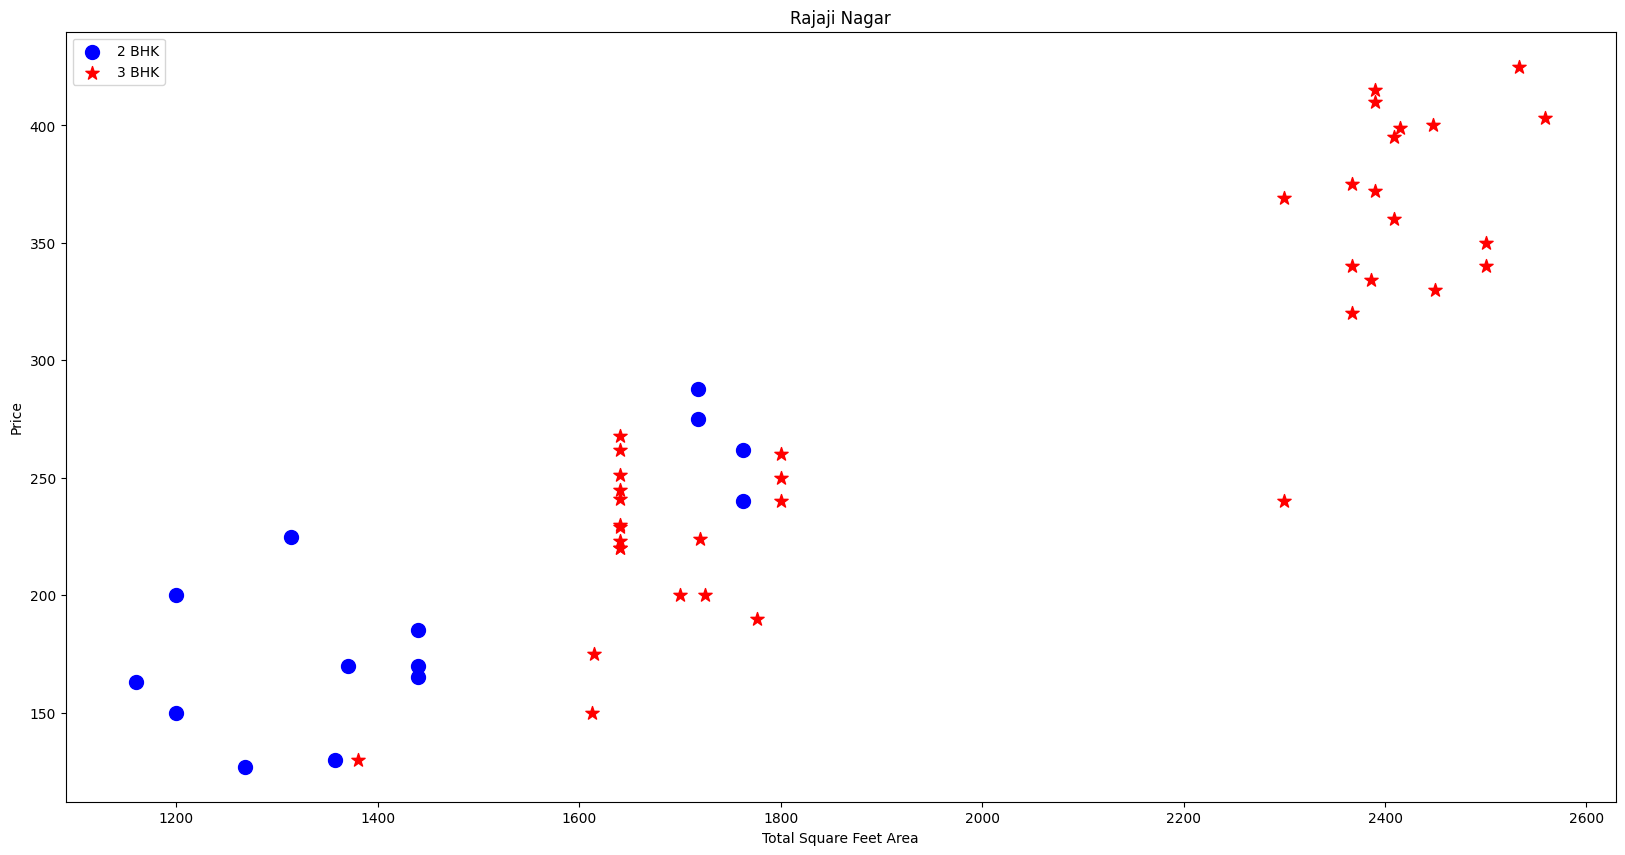

In [41]:
def disp_graph(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location )& (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label ='2 BHK', s=100)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color='red',label='3 BHK',s=100)
    plt.title(location)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.legend()

disp_graph(df6, 'Rajaji Nagar')

Any star below the dot here is an anamoly, have to be outcasted.

Now we will group the data entries based on location and remove the entries where (x+1)BHK.price < mean(x BHK.price)

In [42]:
def remove_bhk_outliers(df):
    exclude_arr = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'cnt' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['cnt'] > 5:
                exclude_arr = np.append(exclude_arr, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_arr,axis='index')

temp_df1 = remove_bhk_outliers(df6)
df6.shape

(10261, 7)

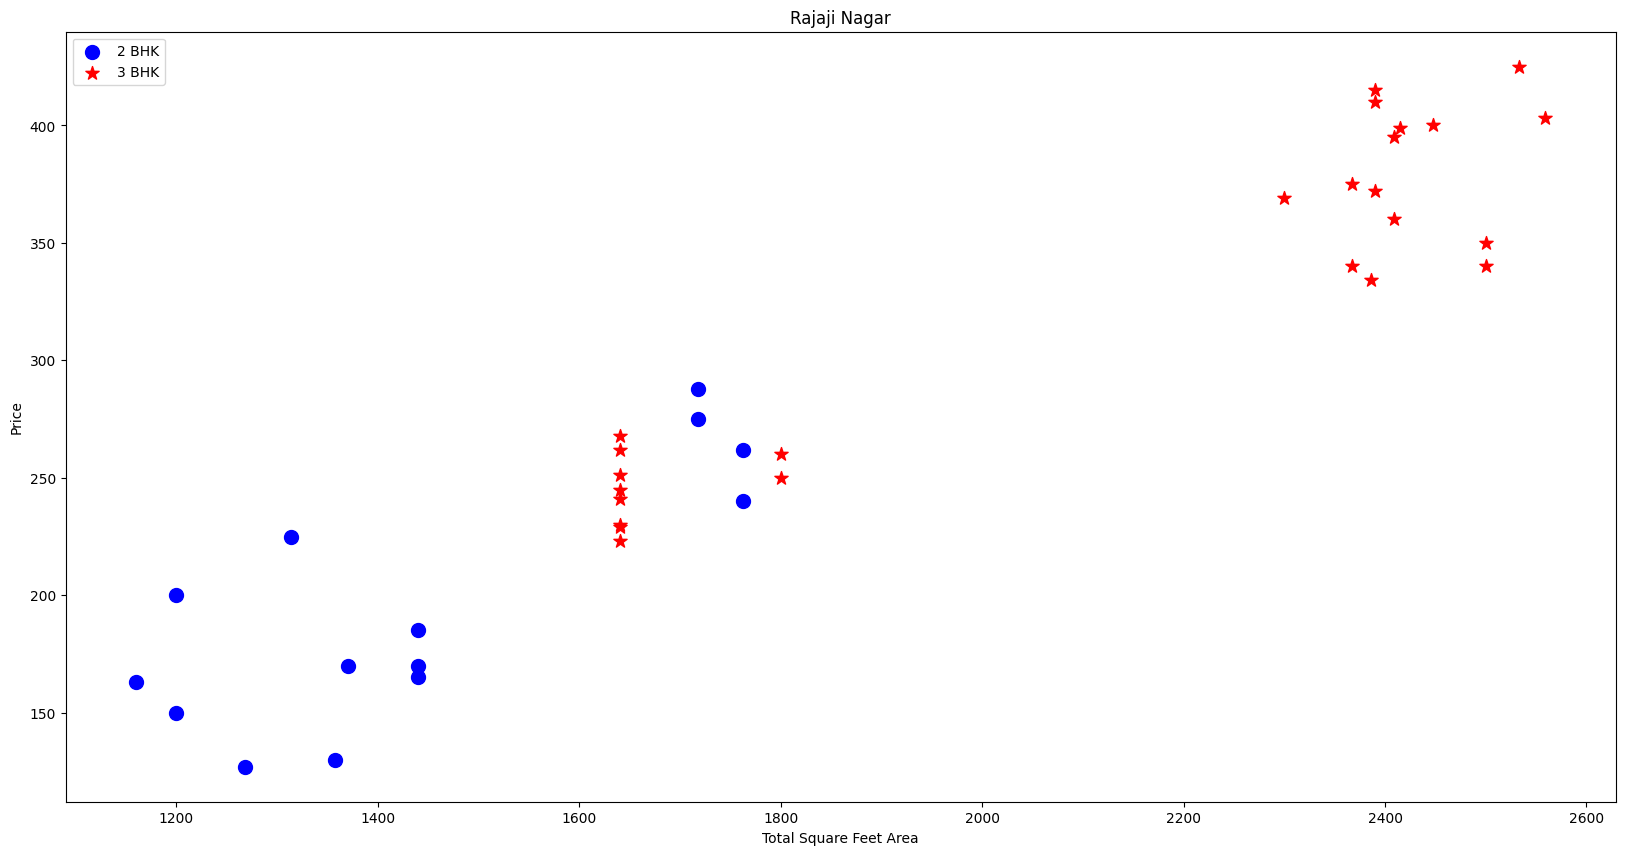

In [43]:
disp_graph(temp_df1, 'Rajaji Nagar')

In [44]:
import pandas as pd
import numpy as np

def clean_area_type(df):

    precedence = {
        'Super built-up Area': 4,
        'Built-up Area': 3,
        'Carpet Area': 2,
        'Plot Area': 1
    }

    # Ensure only valid area_types are processed
    df = df[df['area_type'].isin(precedence.keys())].copy()

    cleaned_parts = []

    # Step 1: Group by location
    for loc, loc_df in df.groupby('location'):
        loc_df = loc_df.sort_values('total_sqft').copy()

        min_sqft = loc_df['total_sqft'].min()
        max_sqft = loc_df['total_sqft'].max()

        # Skip invalid ranges
        if pd.isnull(min_sqft) or pd.isnull(max_sqft):
            continue

        # Step 2: Create sqft bins of 100 each
        bins = list(range(int(min_sqft), int(max_sqft) + 100, 100))
        loc_df['sqft_range'] = pd.cut(loc_df['total_sqft'], bins=bins, right=False)

        # Step 3: For each sqft range, validate precedence order
        for rng, sub_df in loc_df.groupby('sqft_range'):
            if len(sub_df) <= 1:
                cleaned_parts.append(sub_df)
                continue

            # Compute average price per area type
            avg_prices = sub_df.groupby('area_type', as_index=False)['price'].mean()
            avg_prices['precedence'] = avg_prices['area_type'].map(precedence)

            # Sort by precedence descending
            avg_prices = avg_prices.sort_values('precedence', ascending=False).reset_index(drop=True)

            # Detect violations of price order
            to_remove = set()
            for i in range(len(avg_prices) - 1):
                high_type = avg_prices.iloc[i]
                low_type = avg_prices.iloc[i + 1]
                if low_type['price'] > high_type['price']:
                    to_remove.add(low_type['area_type'])

            # Keep only valid entries
            cleaned_sub_df = sub_df[~sub_df['area_type'].isin(to_remove)]
            cleaned_parts.append(cleaned_sub_df)

    # Combine all cleaned data
    df_cleaned = pd.concat(cleaned_parts, ignore_index=True)
    return df_cleaned

df7 = clean_area_type(temp_df1)


C:\Users\Roney Patel\AppData\Local\Temp\ipykernel_22508\1275267577.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for rng, sub_df in loc_df.groupby('sqft_range'):
C:\Users\Roney Patel\AppData\Local\Temp\ipykernel_22508\1275267577.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for rng, sub_df in loc_df.groupby('sqft_range'):
C:\Users\Roney Patel\AppData\Local\Temp\ipykernel_22508\1275267577.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

In [45]:
df7.head(20)

,area_type,location,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk,sqft_range
0,Super built-up Area,Devarachikkanahalli,947.0,43.0,2,4540.654699,473.500000,"[947, 1047)"
1,Super built-up Area,Devarachikkanahalli,991.0,40.0,2,4036.326942,495.500000,"[947, 1047)"
2,Super built-up Area,Devarachikkanahalli,1130.0,36.0,2,3185.840708,565.000000,"[1047, 1147)"
3,Super built-up Area,Devarachikkanahalli,1170.0,40.0,2,3418.803419,585.000000,"[1147, 1247)"
4,Super built-up Area,Devarachikkanahalli,1230.0,58.0,2,4715.447154,615.000000,"[1147, 1247)"
5,Super built-up Area,Devarachikkanahalli,1250.0,40.0,2,3200.000000,625.000000,"[1247, 1347)"
6,Super built-up Area,Devarachikkanahalli,1417.0,76.0,3,5363.443896,472.333333,"[1347, 1447)"
7,Super built-up Area,Devarachikkanahalli,1425.0,65.0,3,4561.403509,475.000000,"[1347, 1447)"
8,Super built-up Area,Devarachikkanahalli,1705.0,75.0,3,4398.826979,568.333333,"[1647, 1747)"
9,Built-up Area,1st Block Jayanagar,1200.0,130.0,3,10833.333333,400.000000,"[1200, 1300)"


Many theoritical concepts has been save in marked down file

In [46]:
import re

def fix_location_spaces(df, col='location'):
    df[col] = df[col].astype(str).apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
    return df

df7 = fix_location_spaces(df7)

In [47]:
dummies = pd.get_dummies(df7.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Drop a coloumn from Dummies Data Frame to avoid 'Dummy Variable Trap'

In [48]:
df8 = pd.concat([df7,dummies.drop('other', axis= 'columns')], axis = 'columns')
df8.head()

,area_type,location,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk,sqft_range,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,Devarachikkanahalli,947.0,43.0,2,4540.654699,473.5,"[947, 1047)",False,False,...,False,False,False,False,False,False,False,False,False,False
1,Super built-up Area,Devarachikkanahalli,991.0,40.0,2,4036.326942,495.5,"[947, 1047)",False,False,...,False,False,False,False,False,False,False,False,False,False
2,Super built-up Area,Devarachikkanahalli,1130.0,36.0,2,3185.840708,565.0,"[1047, 1147)",False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Devarachikkanahalli,1170.0,40.0,2,3418.803419,585.0,"[1147, 1247)",False,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,Devarachikkanahalli,1230.0,58.0,2,4715.447154,615.0,"[1147, 1247)",False,False,...,False,False,False,False,False,False,False,False,False,False


Drop the Location column because dummy variables have been introduced.

In [49]:
df9 = df8.drop('location', axis ='columns')
df9.head()

,area_type,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk,sqft_range,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,947.0,43.0,2,4540.654699,473.5,"[947, 1047)",False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Super built-up Area,991.0,40.0,2,4036.326942,495.5,"[947, 1047)",False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Super built-up Area,1130.0,36.0,2,3185.840708,565.0,"[1047, 1147)",False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,1170.0,40.0,2,3418.803419,585.0,"[1147, 1247)",False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,1230.0,58.0,2,4715.447154,615.0,"[1147, 1247)",False,False,False,...,False,False,False,False,False,False,False,False,False,False


Similarly do it for area_type

In [50]:
dummy = pd.get_dummies(df9.area_type)
dummy.head(2)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,False,False,False,True
1,False,False,False,True


In [51]:
df10 = pd.concat([df9, dummy], axis='columns')
df10.head(2)

,area_type,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk,sqft_range,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,947.0,43.0,2,4540.654699,473.5,"[947, 1047)",False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Super built-up Area,991.0,40.0,2,4036.326942,495.5,"[947, 1047)",False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [52]:
df11 = df10.drop(['area_type', 'Plot Area'], axis='columns')
df11.head()

,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk,sqft_range,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,947.0,43.0,2,4540.654699,473.5,"[947, 1047)",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,991.0,40.0,2,4036.326942,495.5,"[947, 1047)",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1130.0,36.0,2,3185.840708,565.0,"[1047, 1147)",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1170.0,40.0,2,3418.803419,585.0,"[1147, 1247)",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1230.0,58.0,2,4715.447154,615.0,"[1147, 1247)",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [53]:
df11.shape

(6495, 250)

Create X and Y Data Frames for dependent and independent variables

In [54]:
X = df11.drop(['price','sqft_range','price_per_sqft'], axis='columns')
X.head(3)

,total_sqft,bhk,sqft_per_bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,947.0,2,473.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,991.0,2,495.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1130.0,2,565.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [55]:
Y = df11.price
Y.head(2)

0    43.0
1    40.0
Name: price, dtype: float64

# Train The Model

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)


In [57]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train, Y_train)
lnr.score(X_test,Y_test)

0.8199757880917881

# Model validation

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cvs = ShuffleSplit(n_splits=10, test_size=0.2, random_state =10)

res = cross_val_score(LinearRegression(), X, Y, cv=cvs)
res

array([0.81997579, 0.88056928, 0.8819579 , 0.86108719, 0.86135484,
       0.84517508, 0.82192685, 0.85025188, 0.8399936 , 0.89018832])

In [59]:
np.mean(res)

np.float64(0.8552480705197019)

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model (X,y) :
    algos = {
        'linear_regression' : {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'scaler': [StandardScaler(), 'passthrough']
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,Y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model','best_score','best_params'])



In [61]:
find_best_model(X,Y)

C:\Users\Roney Patel\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Roney Patel\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Roney Patel\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Roney Patel\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _val

,model,best_score,best_params
0,linear_regression,0.854734,{'scaler': 'passthrough'}
1,lasso,0.723428,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.739016,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Here we find that, Linear regression is the best predictor


# Train Decision Tree Regressor and Cross Validate it

In [62]:
final_model = DecisionTreeRegressor(
    criterion='friedman_mse', splitter='best', random_state=10
)
final_model.fit(X_train, Y_train)
final_model.score(X_test, Y_test)


0.6422095513578927

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cvs = ShuffleSplit(n_splits=8, test_size=0.2, random_state =10)

res2 = cross_val_score(final_model, X, Y, cv=cvs)
res2

array([0.64220955, 0.8074889 , 0.76928191, 0.78201128, 0.45908866,
       0.75086677, 0.63887822, 0.73273551])

In [64]:
np.mean(res2)

np.float64(0.6978201005521408)

# Fine tuning the Linear Regression Model


In [65]:
lnr.feature_names_in_

array(['total_sqft', 'bhk', 'sqft_per_bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny P

In [66]:
def predict_price2(location, sqft, bhk, build_up):
    if (sqft/bhk) < 300 :
        return ('Minimum of 300 sqft should be alloted to 1 Bedroom')
    elif (sqft/bhk) > 2000:
        return('Maximum of 2000 sqft is alloted to 1 Bedroom')
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = sqft/bhk

    # Set one-hot columns if they exist
    if location in X.columns:
        loc_index = np.where(X.columns == location)[0][0]
        x[loc_index] = 1
    if build_up in X.columns:
        build_up_index = np.where(X.columns == build_up)[0][0]
        x[build_up_index] = 1

    pred = float(lnr.predict([x])[0]) * 100000
    
    abs_value = abs(pred)
    if abs_value >= 1e7:  # 1 crore = 1e7
        formatted = f"{pred/1e7:.2f} Cr"
    elif abs_value >= 1e5:  # 1 lakh = 1e5
        formatted = f"{pred/1e5:.2f} L"
    elif abs_value >= 1e3:
        formatted = f"{pred/1e3:.2f} K"
    else:
        formatted = str(pred)
    return pred, formatted




In [67]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lnr.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df.to_string(index=False))

                    Feature  Coefficient
            Cunningham Road   452.833440
              HAL 2nd Stage   261.704899
                 Giri Nagar   203.117815
                Benson Town   189.620133
               Rajaji Nagar   141.605399
       2nd Stage Nagarbhavi   121.332424
        1st Block Jayanagar   116.060665
      Banashankari Stage II    87.574192
                 Cooke Town    83.526838
              Sarakki Nagar    81.104894
               Malleshwaram    75.229654
               Indira Nagar    74.386628
                  Kodihalli    65.716735
                Koramangala    62.899856
                Frazer Town    42.330932
                 Chamrajpet    35.463242
              BTM 2nd Stage    29.986372
           Hebbal Kempapura    29.372099
              Hosakerehalli    27.276115
                Basavangudi    25.542065
                     Ulsoor    23.020489
                Konanakunte    16.230122
         Basaveshwara Nagar    13.175650
        Sector 7

In [68]:
feature_name = 'Built-up Area'
coef_value = coef_df.loc[coef_df['Feature'] == feature_name, 'Coefficient'].values[0]
print(f"Coefficient for {feature_name}: {coef_value}")


Coefficient for Built-up Area: -15.203578746962748


In [69]:
predict_price2('Indira Nagar', 1102, 3,'Carpet Area')

C:\Users\Roney Patel\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(14911769.675915485, '1.49 Cr')

In [70]:
import pickle
with open('FinalModel.pickle','wb') as f:
    pickle.dump(lnr,f)

In [71]:
import json
columns = {
    'data_colums' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
        f.write(json.dumps(columns))